<a href="https://colab.research.google.com/github/AmrutaKoshe/Resume-Screening/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Statements

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Load the dataset

In [77]:
resume = pd.read_csv("https://raw.githubusercontent.com/AmrutaKoshe/Resume-Screening/main/UpdatedResumeDataSet.csv")

In [78]:
resume

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [79]:
resume['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Count occurrences of each category


In [80]:
resume['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Mechanical Engineer          40
Sales                        40
ETL Developer                40
Data Science                 40
Operations Manager           40
Blockchain                   40
Arts                         36
Database                     33
Health and fitness           30
Electrical Engineering       30
PMO                          30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

## Visualise number of categories

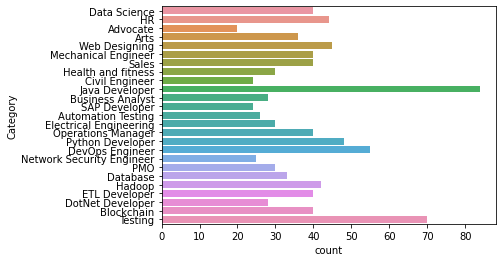

In [81]:
sns.countplot(y="Category", data=resume)

## Data Pre-processing
To remove special characters, hashtags, URLs etc

In [82]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resume['cleaned_resume'] = resume.Resume.apply(lambda x: cleanResume(x))

In [83]:
resume

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [84]:
# Print a sample original resume
print('--- Original resume ---')
print(resume['Resume'][0])

--- Original resume ---
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and 

In [85]:
# Print the same resume after text cleaning
print('--- Cleaned resume ---')
print(resume['cleaned_resume'][0])

--- Cleaned resume ---
Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assis

## Visualising common words with wordcloud

In [86]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume['cleaned_resume'].values
cleanedSentences = ""
for i in range(len(resume)):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process'

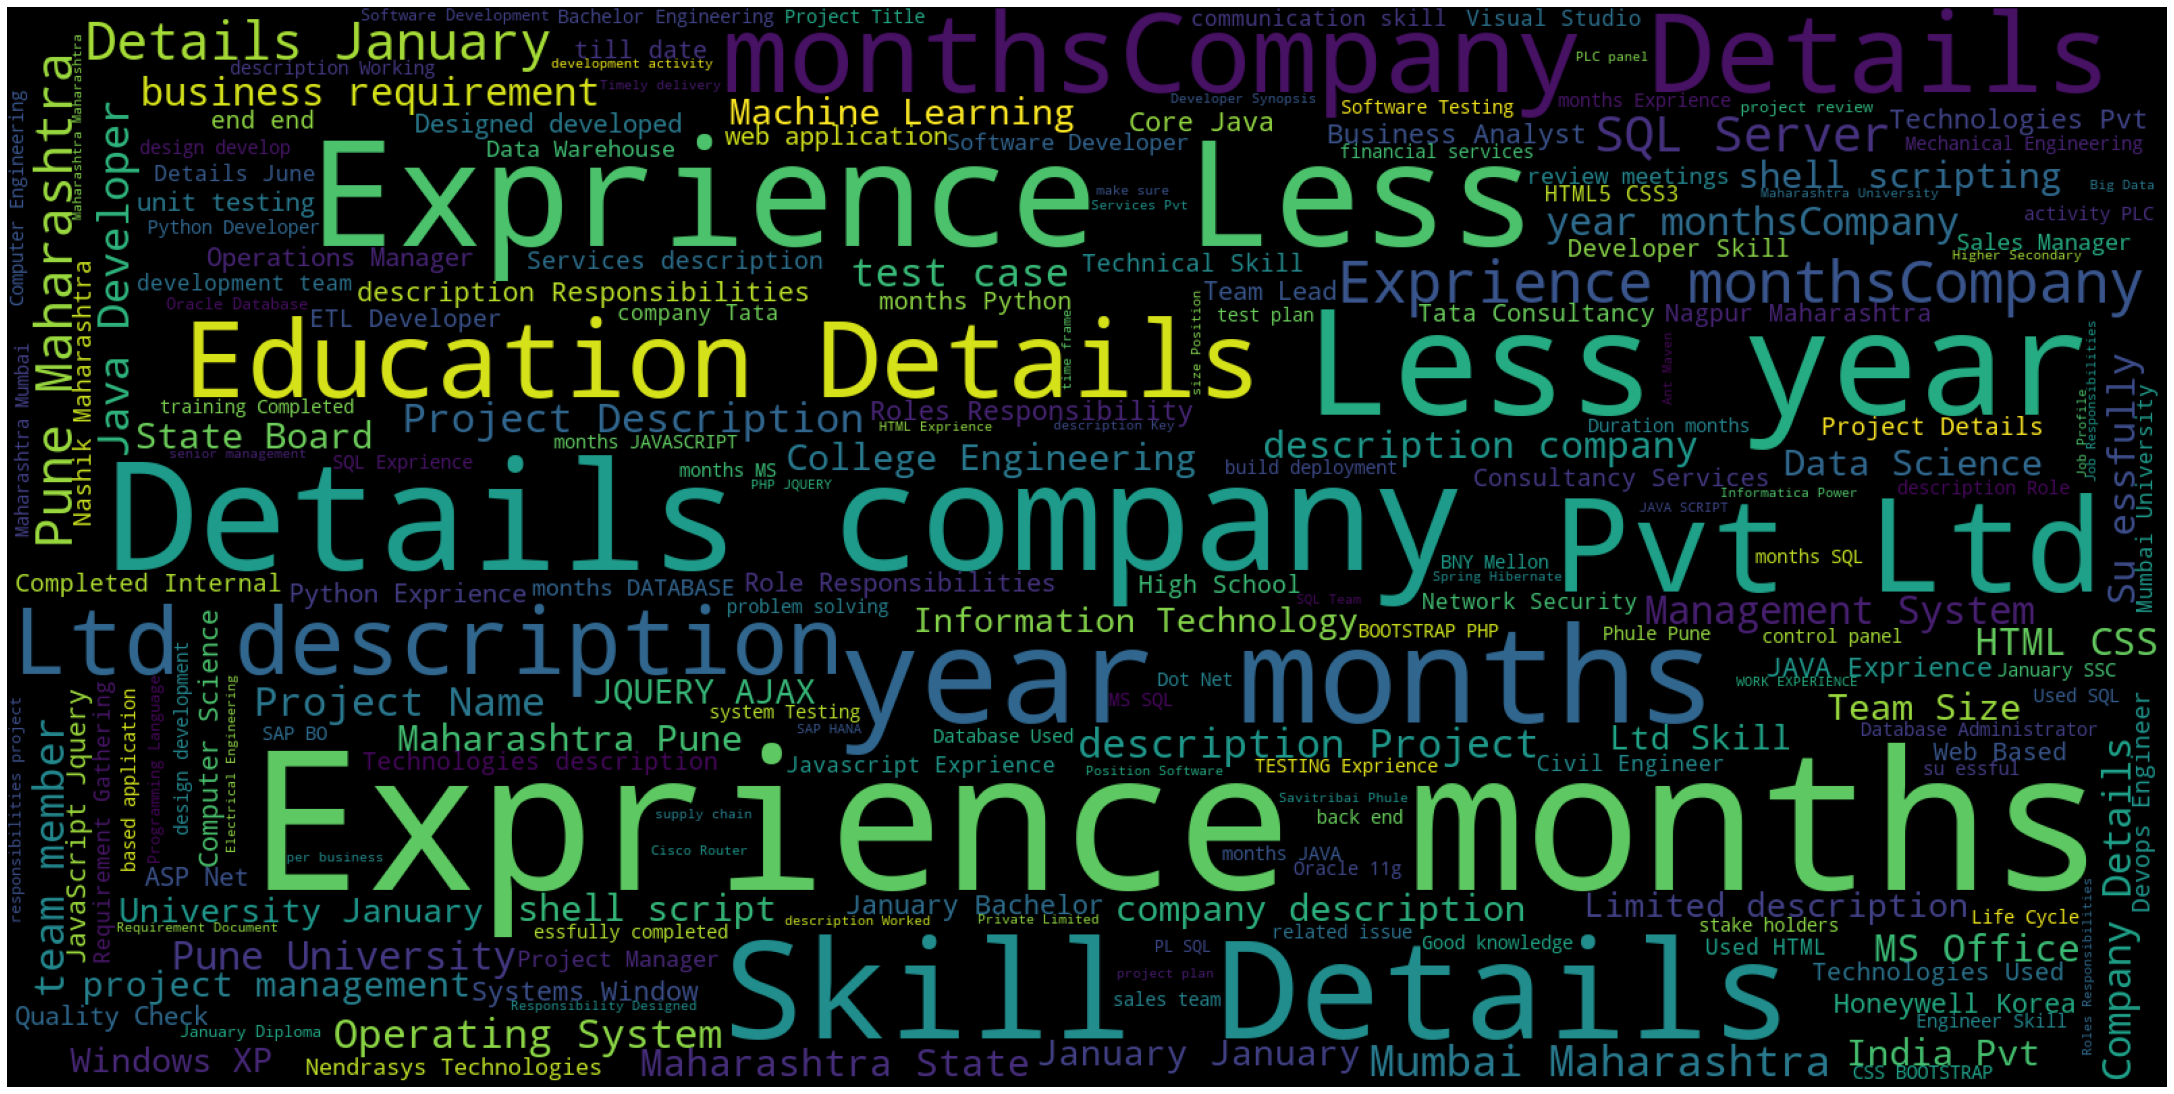

In [87]:
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate(cleanedSentences)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

## Get features and labels 

In [88]:
from sklearn.utils import shuffle


# Get features and labels from data and shuffle
features = resume['cleaned_resume'].values
original_labels = resume['Category'].values
labels = original_labels[:]

for i in range(len(resume)):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

Education Details May 1999 to September 2002 Diploma Mechanical Engg Mumbai Maharashtra Institute of Mechanical Engg May 1998 to May 1999 Diploma Mechanical Engg Services ITES May 1993 to May 1995 Mumbai Maharashtra Industrial Training Institute Sr Executive Mechanical Engineering Automation Projects Consultant Sr Executive Mechanical Engineering Automation Projects Consultant Mechanical Engineering Skill Details Microsoft Office Word Excel Auto cad Micro station J ERP 3d Modeling software Exprience 120 monthsCompany Details company Mechanical Engineering description Role Responsibilities Application Engineering Pre Sales Inside Sales Provide applications support to inside sales personnel and outside sales channels Provide product selection and materials of construction technical recommendations Participate in the necessary training activities to establish technical competency also Participate in Field Service trips as directed by Top Mgmt Assist Brand Managers and or Product Managers 

## Split into test and train

In [89]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * len(resume))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

769
193


## Tokenize features and labels

In [90]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 6000
oov_tok = '<OOV>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<OOV>': 1, 'and': 2, 'the': 3, 'of': 4, 'to': 5, 'in': 6, 'for': 7, 'exprience': 8, 'with': 9, 'company': 10, 'a': 11, 'project': 12, 'months': 13, 'description': 14, 'details': 15, 'on': 16, 'as': 17, 'data': 18, '1': 19, 'management': 20, 'team': 21, 's': 22, 'is': 23, '6': 24, 'maharashtra': 25, 'system': 26, 'testing': 27, 'year': 28, 'database': 29, 'from': 30, 'all': 31, 'development': 32, 'business': 33, 'than': 34, 'ltd': 35, 'test': 36, 'by': 37, 'less': 38, 'using': 39, 'sql': 40, 'skill': 41, 'january': 42, 'client': 43, 'java': 44, 'developer': 45, 'engineering': 46, 'application': 47, 'pune': 48, 'work': 49, 'services': 50, 'skills': 51, 'c': 52, 'software': 53, 'pvt': 54, 'education': 55, 'responsibilities': 56, 'sales': 57, 'reports': 58, 'process': 59, 'it': 60, 'operations': 61, 'requirements': 62, 'customer': 63, 'server': 64, 'technical': 65, 'technologies': 66, 'that': 67, 'university': 68, 'india': 69, '2': 70, 'i': 71, 'monthscompany': 72, 'design': 73, 'working

In [91]:
# Tokenize label data 
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

{'javadeveloper': 1, 'testing': 2, 'devopsengineer': 3, 'pythondeveloper': 4, 'webdesigning': 5, 'hr': 6, 'hadoop': 7, 'mechanicalengineer': 8, 'blockchain': 9, 'datascience': 10, 'etldeveloper': 11, 'sales': 12, 'operationsmanager': 13, 'arts': 14, 'database': 15, 'electricalengineering': 16, 'healthandfitness': 17, 'pmo': 18, 'dotnetdeveloper': 19, 'businessanalyst': 20, 'automationtesting': 21, 'networksecurityengineer': 22, 'civilengineer': 23, 'sapdeveloper': 24, 'advocate': 25}


In [92]:

# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[  55   15  301 2268    5 1337 2803  246  303 1194  108   25  277    4
  303 1194  301 2054    5  301 2268  246  303 1194   50 4439  301 3358
    5  301 2055  108   25  501  106  277  785  858  303   46   83  104
  572  785  858  303   46   83  104  572  303   46   41   15  305  153
  594  312  800 1473 1677  699 2056  426 1585 1678   53    8 2117   72
   15   10  303   46   14   86   56   47   46  372   57 1757   57  169
  187   88    5 1757   57 2407    2 2903   57 1413  169  181 1102    2
  644    4  577   65 1429  484    6    3  735  106  100    5 1758   65
 2408  179  484    6  602  147 3359   17 4440   37  801 4441  766 1961
  587    2  122  181  587   17 1679 2409  834   86   17   88    7    3
  104 1103   21  555  154    7    3   65  421    4   12 1759  314 1102
 2904    2 1680    4 1286   83  249 1605 1825 2905 2159    2  602 1287
  507   16    3  355    4    3   63   22   18 2639    2   46  466 1550
   17  159    5   88    3  602   57 1455    2    5 2410   10  249    2
   50 

## Train the Sequential model



In [93]:

# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 1, 64)             384000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 26)                1690      
Total params: 459,994
Trainable params: 459,994
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

In [95]:
# Train the neural network
num_epochs = 12

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/12
25/25 - 11s - loss: 3.2064 - accuracy: 0.1261 - val_loss: 3.0673 - val_accuracy: 0.1140
Epoch 2/12
25/25 - 7s - loss: 2.9174 - accuracy: 0.2315 - val_loss: 2.5612 - val_accuracy: 0.2902
Epoch 3/12
25/25 - 7s - loss: 2.4180 - accuracy: 0.3251 - val_loss: 2.4316 - val_accuracy: 0.3264
Epoch 4/12
25/25 - 7s - loss: 1.9144 - accuracy: 0.4096 - val_loss: 1.6092 - val_accuracy: 0.5181
Epoch 5/12
25/25 - 7s - loss: 1.2465 - accuracy: 0.6801 - val_loss: 1.2341 - val_accuracy: 0.6736
Epoch 6/12
25/25 - 7s - loss: 0.9473 - accuracy: 0.7698 - val_loss: 0.8013 - val_accuracy: 0.8601
Epoch 7/12
25/25 - 7s - loss: 0.5438 - accuracy: 0.8817 - val_loss: 0.5512 - val_accuracy: 0.9223
Epoch 8/12
25/25 - 7s - loss: 0.3302 - accuracy: 0.9688 - val_loss: 0.3764 - val_accuracy: 0.9585
Epoch 9/12
25/25 - 7s - loss: 0.2782 - accuracy: 0.9506 - val_loss: 0.3378 - val_accuracy: 0.9793
Epoch 10/12
25/25 - 7s - loss: 0.1840 - accuracy: 0.9805 - val_loss: 0.2417 - val_accuracy: 0.9793
Epoch 11/12
25/25 

In [96]:
# print example feature and its correct label
print(test_features[5])
print(test_labels[5])

SKILLS 1 MS Office 2 Good Communication skills and Convincing Power 3 Knowledge of sales and marketing 4 Customer sales management 5 Talent management 6 Direct sales management STRENGTHS 1 Dedication and dependability 2 Flexibility able to work in taxing and demanding conditions on reasonably stretchable time slots 3 Team work able to work cooperatively in a team and lead the team to su ess Education Details Sales manager Skill Details AND MARKETING Exprience 6 months DIRECT SALES Exprience 36 months MARKETING Exprience 6 months OF SALES Exprience 36 months SALES Exprience 36 monthsCompany Details company Bajaj finance description company Bajaj finance description SBI BANK AS A OFFICE ASSISTENCE FOR 1 YEAR K G N SHOPE AS A OFFICE ASSISTENCE 6 MONTH VODAFONE AS A TELLE CALLER 1 YEAR Bajaj Finserv Ltd AS An Assistant Sales Manager 11 MONTH Square Capital AS A Sales Manager 5 MONTH At present working in Bajaj Housing Finance Ltd AS An Assistant Sales Manager
sales


In [97]:
score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)

7/7 [==============================] - 0s 53ms/step - loss: 0.3572 - accuracy: 0.9326


In [98]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.35723352432250977
Test Accuracy: 0.9326424598693848


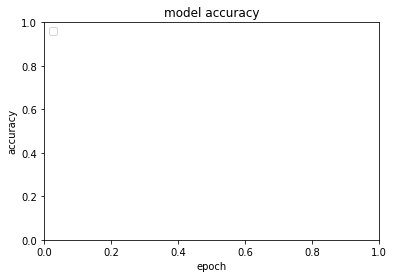

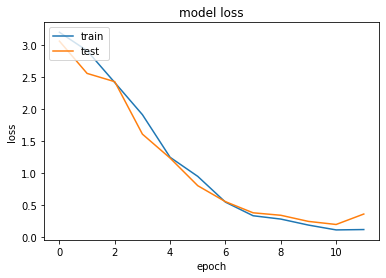

In [101]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()